In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [5]:
train=pd.read_csv(r'F:\Machine learning\Datasets\Titanic_Logistic Regression\train.csv')
X_test=pd.read_csv(r'F:\Machine learning\Datasets\Titanic_Logistic Regression\test.csv')
y_test=pd.read_csv(r'F:\Machine learning\Datasets\Titanic_Logistic Regression\gender_submission.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

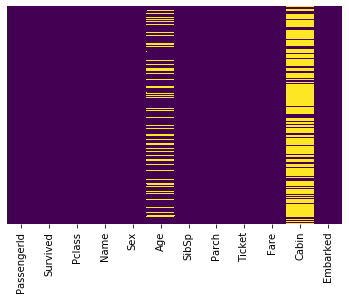

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)
#yticklabels=False just makes labels on Y axis not appear.
#cbar->False =>color bar doesnt appear on RHS

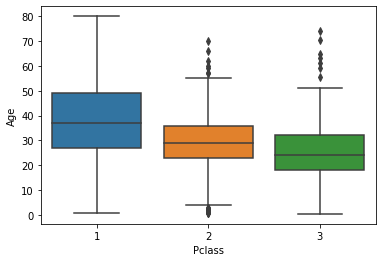

In [14]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [15]:
# Mean age of P1,P2,P3 class is 37,30,25

In [27]:
# a fun to impute missing vals in age col:
def impute_mean(cols):
    pclass=cols[0]
    age=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        if pclass==2:
            return 30
        if pclass==3:
            return 25
    else:
        return age
    

In [31]:
train[['Age']]=train[['Pclass','Age']].apply(impute_mean,axis=1)

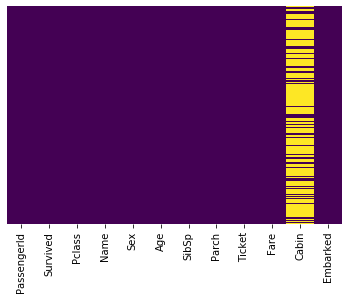

In [32]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [33]:
#Missing vals in Age have been imputed.

In [35]:
#We drop cabin .

In [36]:
train.drop(['Cabin'],axis=1,inplace=True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,25.0,0,0,373450,8.0500,S


In [38]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [39]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [42]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,25.0,1,0,7.2500,S
1,2,1,1,female,37.0,1,0,71.2833,C
2,3,1,3,female,25.0,0,0,7.9250,S
3,4,1,1,female,37.0,1,0,53.1000,S
4,5,0,3,male,25.0,0,0,8.0500,S


In [44]:
#get dummies for categorical features

In [51]:
pd.get_dummies(train['Embarked'],drop_first=True).head()
#We drop the first one as only 2 cols are sufficient fr # categories. 
# i.e if both cols are ), then it means 3rd category

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [52]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [53]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [57]:
train=pd.concat([train,sex,embarked],axis=1)

In [59]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64